# Titanic -Machine Learning From Disaster

Predict survival on the Titanic and get familiar with ML basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


### Importing the datasets

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
test_data_org = pd.read_csv("test.csv")

In [5]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.shape
# in case single row is missing --> survived col 

(418, 11)

##### Percentage Of Women and Men Survived

In [7]:
train_data[["Sex","Survived"]]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [8]:
train_data[train_data["Sex"]=='female']['Survived']

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [9]:
Female = np.average((train_data.Sex=='female') & (train_data.Survived==1))*100
male = np.average((train_data.Sex=="male") & (train_data.Survived==1))*100

In [10]:
print("The avg. of Male Survived = ",male)
print("The avg. of Female Survived = ",Female)

The avg. of Male Survived =  12.2334455667789
The avg. of Female Survived =  26.15039281705948


In [11]:
a = (train_data.Sex=='female') & (train_data.Survived==1)

In [12]:
train_data[a][["Name","Survived"]]

,Name,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1
9,"Nasser, Mrs. Nicholas (Adele Achem)",1
...,...,...
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",1
875,"Najib, Miss. Adele Kiamie ""Jane""",1
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1
880,"Shelley, Mrs. William (Imanita Parrish Hall)",1


#### Describing Data

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# in case age columns contain the null value
train_data.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [16]:
# train_data[train_data.Age.isnull()]['Age'] 
np.where(train_data.Age.isnull()==True)              # index value of all null column in the "age"

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

* Large no. of data is null so rather to drop the null columns we must fill with (min/avg/mean/mode/median)
* Let take missing data fill with --> mean (age)

In [17]:
a = np.median(train_data[train_data['Age'].notnull()]['Age'])
b = np.round(np.mean(train_data[train_data['Age'].notnull()]['Age']),0)
a,b


(28.0, 30.0)

let's take mean value that replace with null value

In [18]:
train_data['Age']=train_data['Age'].fillna(b)

In [19]:
np.where(train_data.Embarked.isnull()==True)

(array([ 61, 829]),)

In [20]:
# in case it only contain 2 row with null value so it not affect our output
train_data = train_data.dropna(axis=0,subset=['Embarked'])

#### Relation b/w dependent variable and independent variable

In [21]:
a=train_data['Survived']==1

No handles with labels found to put in legend.


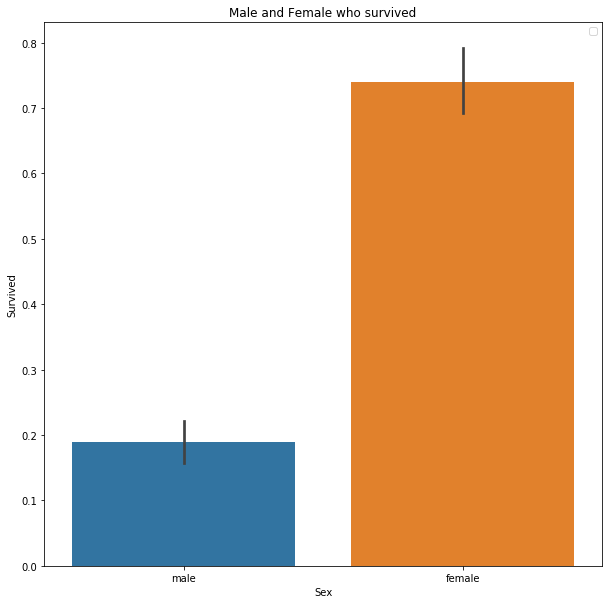

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x=train_data['Sex'],y=a)
plt.title("Male and Female who survived")
plt.legend()

#####  Relation b/w a person who survived and not survived with there age

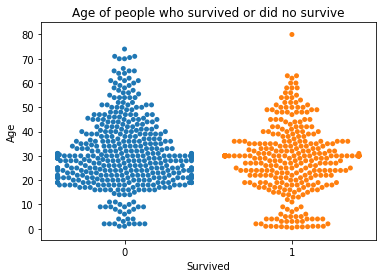

In [23]:
plt.title("Age of people who survived or did no survive")
sns.swarmplot(x = train_data['Survived'], y= train_data['Age'])

#####  Survived and not Survived people with their Fare and Age

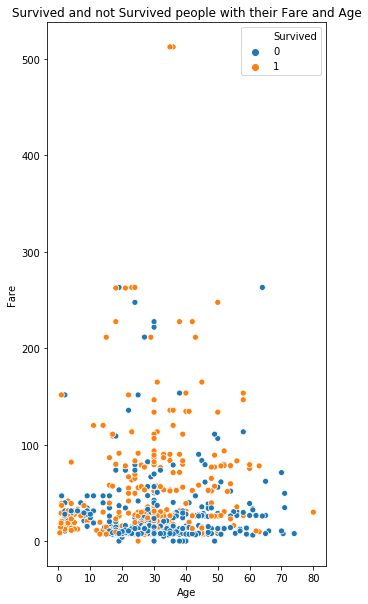

In [24]:
plt.figure(figsize=(5,10))
plt.title("Survived and not Survived people with their Fare and Age")
sns.scatterplot(x=train_data['Age'],y=train_data['Fare'],hue = train_data['Survived'])

##### People 's fair who Survived

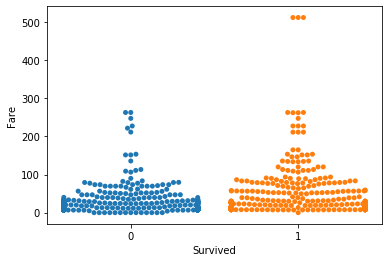

In [25]:
sns.swarmplot(x=train_data['Survived'], y=train_data['Fare'])

######  Train_Data
"Survived" --> used for the prediction so we put into y and remove in the train_data

In [26]:
y = train_data['Survived'].values
print(y.shape)
print(pd.DataFrame(y))

(889,)
     0
0    0
1    1
2    1
3    1
4    0
..  ..
884  0
885  1
886  0
887  1
888  0

[889 rows x 1 columns]


### Merging Train Data and Test Data

In [27]:
a =train_data.shape
b = test_data.shape
a,b

# "Survived" columns used for the output purpose --- (y)

train_data=train_data.drop(['Survived'],axis=1)


In [28]:
# Concated both the data 
concated_data = pd.concat([train_data,test_data],ignore_index=True)
concated_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1302,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1303,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1304,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1305,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


####  Feature Engineering

In [29]:
# in case both are indicate toward the family member ----> join  
#sibsp	    # of siblings / spouses aboard the Titanic
#parch	    # of parents / children aboard the Titanic

concated_data['Relatives'] = concated_data['SibSp'] + concated_data['Parch']
concated_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1302,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1303,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1304,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1305,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [30]:
concated_data['Relatives'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In case no. of family member is travel they say :
* In case we create a new column --> Travel_alone
* Relatives > 0 so   Travel_alone ="NO"
* Relatives = 0 so   Travel_alone = "Yes"


In [31]:
concated_data.loc[concated_data['Relatives']> 0, "Travel_alone"] = 'NO'
concated_data.loc[concated_data['Relatives']==0, "Travel_alone"]= 'Yes'

In [32]:
concated_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Travel_alone
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,NO
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,NO
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Yes
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,NO
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Yes


#### Feature Selection
* For Train the model
* in case output or label col -- PassengerID and Survived

In [33]:
x = concated_data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Relatives"]].values
x[:5]

array([[3, 'male', 22.0, 1, 0, 7.25, 'S', 1],
       [1, 'female', 38.0, 1, 0, 71.2833, 'C', 1],
       [3, 'female', 26.0, 0, 0, 7.925, 'S', 0],
       [1, 'female', 35.0, 1, 0, 53.1, 'S', 1],
       [3, 'male', 35.0, 0, 0, 8.05, 'S', 0]], dtype=object)

In [34]:
a=pd.DataFrame(x)
a.isna().sum().sum()  

87

In [35]:
a.isna().sum()


0     0
1     0
2    86
3     0
4     0
5     1
6     0
7     0
dtype: int64

In case total 89 missing data we must take care of the missing data 

#### Taking Care of missing data

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [38]:
# in case select the age col and fare col
imputer.fit(x[:,2].reshape(-1,1))               # in case we select a single row [series] so it convert into array
x[:,2] = (imputer.transform(x[:,2].reshape(-1,1))).reshape(-1,)

imputer.fit(x[:,5].reshape(-1,1))
x[:,5] = (imputer.transform(x[:,5].reshape(-1,1))).reshape(-1,)

print(x[:6])

[[3 'male' 22.0 1 0 7.25 'S' 1]
 [1 'female' 38.0 1 0 71.2833 'C' 1]
 [3 'female' 26.0 0 0 7.925 'S' 0]
 [1 'female' 35.0 1 0 53.1 'S' 1]
 [3 'male' 35.0 0 0 8.05 'S' 0]
 [3 'male' 30.0 0 0 8.4583 'Q' 0]]


#### Encoding Categorical Data :-
* Categorical Data --> numerical
* 1) LabelEncoder
* 2) OneHotEncoder
* 3) ColumnTransformers  --> label+OneHot Encoder

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[6])],remainder='passthrough')

In [40]:
x = np.array(ct.fit_transform(x))
pd.DataFrame(x[:5,:])

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,3,male,22,1,0,7.25,1
1,1,0,0,1,female,38,1,0,71.2833,1
2,0,0,1,3,female,26,0,0,7.925,0
3,0,0,1,1,female,35,1,0,53.1,1
4,0,0,1,3,male,35,0,0,8.05,0


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,4]=le.fit_transform(x[:,4])
print(x[:6,:])

[[0.0 0.0 1.0 3 1 22.0 1 0 7.25 1]
 [1.0 0.0 0.0 1 0 38.0 1 0 71.2833 1]
 [0.0 0.0 1.0 3 0 26.0 0 0 7.925 0]
 [0.0 0.0 1.0 1 0 35.0 1 0 53.1 1]
 [0.0 0.0 1.0 3 1 35.0 0 0 8.05 0]
 [0.0 1.0 0.0 3 1 30.0 0 0 8.4583 0]]


In [42]:
# Checking for the nan values
np.isnan(np.sum(x))

False

##### Train data and Test data

In [43]:
y.shape

(889,)

In [44]:
# in above case test file is start from 891 
test_data = x[889:]
x = x[:889]
print(x.shape ,test_data.shape)

(889, 10) (418, 10)


In [45]:
test_data[:6]

array([[0.0, 1.0, 0.0, 3, 1, 34.5, 0, 0, 7.8292, 0],
       [0.0, 0.0, 1.0, 3, 0, 47.0, 1, 0, 7.0, 1],
       [0.0, 1.0, 0.0, 2, 1, 62.0, 0, 0, 9.6875, 0],
       [0.0, 0.0, 1.0, 3, 1, 27.0, 0, 0, 8.6625, 0],
       [0.0, 0.0, 1.0, 3, 0, 22.0, 1, 1, 12.2875, 2],
       [0.0, 0.0, 1.0, 3, 1, 14.0, 0, 0, 9.225, 0]], dtype=object)

#### Splitting The Data

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 1)

In [47]:
x_train[:6]

array([[0.0, 0.0, 1.0, 2, 0, 30.0, 0, 0, 13.0, 0],
       [0.0, 0.0, 1.0, 2, 0, 27.0, 1, 0, 21.0, 1],
       [0.0, 0.0, 1.0, 3, 1, 22.0, 0, 0, 9.35, 0],
       [0.0, 0.0, 1.0, 2, 1, 2.0, 1, 1, 26.0, 2],
       [0.0, 1.0, 0.0, 3, 1, 30.0, 0, 0, 7.75, 0],
       [1.0, 0.0, 0.0, 3, 1, 25.0, 0, 0, 7.225, 0]], dtype=object)

In [48]:
x_test[:6]

array([[0.0, 0.0, 1.0, 2, 0, 36.0, 0, 0, 13.0, 0],
       [0.0, 0.0, 1.0, 2, 0, 50.0, 0, 1, 26.0, 1],
       [0.0, 0.0, 1.0, 3, 1, 48.0, 0, 0, 7.8542, 0],
       [0.0, 1.0, 0.0, 3, 0, 16.0, 0, 0, 7.75, 0],
       [0.0, 0.0, 1.0, 3, 1, 14.0, 5, 2, 46.9, 7],
       [0.0, 0.0, 1.0, 1, 0, 35.0, 1, 0, 53.1, 1]], dtype=object)

In [49]:
y_train[:6]

array([1, 0, 0, 1, 0, 0])

In [50]:
y_test[:6]

array([1, 1, 0, 1, 0, 1])

In [51]:
(x_train.shape),(x_test.shape),(y_train.shape),(y_test.shape)

((666, 10), (223, 10), (666,), (223,))

#### Feature Scaling
* Standard Scaling

In [52]:
pd.DataFrame(x_test)
# from 3 col and 5 col and 8 col no. are vary from each other . 
# applying the standarscaling from the 3 col. onward

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,2,0,36,0,0,13,0
1,0,0,1,2,0,50,0,1,26,1
2,0,0,1,3,1,48,0,0,7.8542,0
3,0,1,0,3,0,16,0,0,7.75,0
4,0,0,1,3,1,14,5,2,46.9,7
...,...,...,...,...,...,...,...,...,...,...
218,0,0,1,3,1,35,0,0,8.05,0
219,0,0,1,1,1,42,1,0,52,1
220,0,1,0,3,1,30,1,0,15.5,1
221,0,0,1,3,0,21,2,2,34.375,4


In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train[:,3:] = ss.fit_transform(x_train[:,3:])
x_test[:,3:] = ss.fit_transform(x_test[:,3:])
test_data[:,3:] = ss.fit_transform(test_data[:,3:])

In [54]:
pd.DataFrame(x_train[:5])

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,-0.413141,-1.36773,0.0150499,-0.462068,-0.472574,-0.413073,-0.559296
1,0,0,1,-0.413141,-1.36773,-0.212612,0.467652,-0.472574,-0.212108,0.0709766
2,0,0,1,0.804346,0.731138,-0.592049,-0.462068,-0.472574,-0.504763,-0.559296
3,0,0,1,-0.413141,0.731138,-2.1098,0.467652,0.737943,-0.0865052,0.701249
4,0,1,0,0.804346,0.731138,0.0150499,-0.462068,-0.472574,-0.544956,-0.559296


In [55]:
pd.DataFrame(x_test[:5])

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,-0.264011,-1.33697,0.532916,-0.514055,-0.482453,-0.381417,-0.570129
1,0,0,1,-0.264011,-1.33697,1.67189,-0.514055,0.862385,-0.197909,0.0212141
2,0,0,1,0.890391,0.747958,1.50918,-0.514055,-0.482453,-0.454055,-0.570129
3,0,1,0,0.890391,-1.33697,-1.0942,-0.514055,-0.482453,-0.455526,-0.570129
4,0,0,1,0.890391,0.747958,-1.25691,3.73166,2.20722,0.0971142,3.56927


### PCA 
* Apply PCA for dimmensionality reduction : mean =0 and standard deviation =1
* Data --->1) StandardScaling ----->2) PCA

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
test_data = pca.transform(test_data)

In [57]:
pd.DataFrame(x_train[:4])

,0,1,2,3,4,5
0,-0.522737,0.416579,-1.282011,0.394347,-0.530152,-0.719520
1,0.399550,0.227028,-0.904868,0.129824,-1.032354,-0.750345
2,-1.053296,-1.044276,0.054419,-0.522937,0.233050,0.063417
3,1.193411,-0.945074,0.028054,-1.671977,0.855845,-0.772798


In [58]:
pd.DataFrame(x_test)

,0,1,2,3,4,5
0,-0.661993,0.539659,-1.068826,0.803294,-0.576564,-0.537254
1,0.175875,0.930169,-0.540598,2.094536,0.217119,-0.310777
2,-1.469846,-0.245967,0.925513,1.091460,-0.029194,0.429259
3,-0.478335,-0.888395,-1.958392,-0.153378,-0.572375,0.517028
4,4.985324,-2.312521,2.027040,-0.357252,-0.224355,-0.191885
...,...,...,...,...,...,...
218,-1.275195,-0.658285,0.481410,0.275348,0.115496,0.289099
219,-0.300195,1.280133,1.298708,0.000727,-0.251624,-0.770882
220,-0.433200,-0.920886,0.607220,-0.059945,-0.446073,0.818835
221,3.086890,-1.258515,-0.686323,0.921342,0.404908,-0.102103


### K-Fold Cross Validation

#### Note:
* In case we use or we go through with "Pipeline" processing :

In [59]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config   # for display the pipeline diagram
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix 


In [60]:
# K-Fold Cross Validation
def K_Fold_CV(model):
    pipeline = make_pipeline(model)
    scores = cross_val_score(pipeline,X=x_train,y=y_train,cv=10,n_jobs=1)
    print('Cross Validation accuracy: %2f +- %2f' %(np.mean(scores),np.std(scores)))
    return (np.mean(scores))

### Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
def best_param(model,param_grid):
    gs = GridSearchCV(model,param_grid,cv=10 , n_jobs=-1)
    gs.fit(x_train,y_train)
    print("best params: ", gs.best_params_)

### Checking the Overfitting

In [63]:
def check_Overfitting(yhat_test,model):
    yhat_train = model.predict(x_train)
    return accuracy_score(y_train, yhat_train),accuracy_score(y_test,yhat_test)

## Applying Machine Learning Algorithm 
* 1) Logistic Regression
* 2) Ridge Classification
* 3) Naive Byes
* 4) XG_Boost Classifier
* 5) Random Forest
* 6) KNN
* 7) SVC
* 8) Decision Tree

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

best_K_FCV ={
    "Logistic Regression": K_Fold_CV(classifier)
}
classifier.fit(x_train,y_train)

Cross Validation accuracy: 0.780823 +- 0.029063


LogisticRegression()

In [65]:
y_pred = classifier.predict(x_test)  # predict(x_test) is done after the model prediciton

Overfitting ={
    "train_Log,test_Log": check_Overfitting(y_pred,classifier)
}
# test_data --PCA
y_pred_TD_LogR = classifier.predict(test_data)

In [66]:
Overfitting

{'train_Log,test_Log': (0.7852852852852853, 0.8385650224215246)}

In [67]:
print((np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [68]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("")
print("Accuracy of the model :",accuracy_score(y_test,y_pred))

best_Acc={
    "Logistic Regression:":accuracy_score(y_test,y_pred)
}

[[122  16]
 [ 20  65]]

Accuracy of the model : 0.8385650224215246


### Ridge Classifier

In [69]:
from sklearn.linear_model import RidgeClassifier

# HyperTunning -- alpha, max_iter, to
param_grid = {
    'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'max_iter':[15,25,30,50,75,85,100],
    'tol':[0.0001,0.00005,0.001,0.002,0.005,0.007,0.009] # 1e^-3
}
best_param(RidgeClassifier(random_state = 1),param_grid)

best params:  {'alpha': 0.1, 'max_iter': 15, 'tol': 0.0001}


In [70]:
#best params:  {'alpha': 0.1, 'max_iter': 15, 'tol': 0.0001}
classifier_RLC =RidgeClassifier(alpha= 0.1, max_iter= 15, tol= 0.0001,random_state = 1)

best_K_FCV['Ridge_Classifier'] = K_Fold_CV(classifier_RLC) # adding in the dictionary K_FC

classifier_RLC.fit(x_train,y_train)

Cross Validation accuracy: 0.777838 +- 0.035564


RidgeClassifier(alpha=0.1, max_iter=15, random_state=1, tol=0.0001)

In [71]:
y_pred_RLC = classifier_RLC.predict(x_test)
Overfitting["train_RLC,test_RLC"] = check_Overfitting(y_pred_RLC,classifier_RLC)
y_pred_TD_RLC = classifier_RLC.predict(test_data)

In [72]:
print((np.concatenate((y_pred_RLC.reshape(len(y_pred_RLC),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [73]:
cm = confusion_matrix(y_test,y_pred_RLC)
print(cm)
print("")
print("Accuracy of the model:", accuracy_score(y_test,y_pred_RLC))
best_Acc["Ridge"] = accuracy_score(y_test,y_pred_RLC)

[[123  15]
 [ 20  65]]

Accuracy of the model: 0.8430493273542601


### Naive_Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()

best_K_FCV['Naive Bayes'] = K_Fold_CV(classifier_NB)

classifier_NB.fit(x_train,y_train)

Cross Validation accuracy: 0.773202 +- 0.043119


GaussianNB()

In [75]:
y_pred_NB = classifier_NB.predict(x_test)
Overfitting["train_NB,test_NB"] = check_Overfitting(y_pred_NB,classifier_NB)
y_pred_TD_NB = classifier_NB.predict(test_data)

In [76]:
print((np.concatenate((y_pred_NB.reshape(len(y_pred_NB),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [77]:
cm =confusion_matrix(y_test,y_pred_NB)
print(cm)
print("")
print("Accuracy of the Model: ", accuracy_score(y_test,y_pred_NB))
best_Acc["Naive Bayes"] = accuracy_score(y_test,y_pred_NB)

[[124  14]
 [ 18  67]]

Accuracy of the Model:  0.8565022421524664


### XGBoost Classifier

In [78]:
from xgboost import XGBClassifier

classifier_XGB = XGBClassifier()

best_K_FCV['XGBoost Classifier'] = K_Fold_CV(classifier_XGB)

classifier_XGB.fit(x_train , y_train)

[11:34:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
y_pred_XGB = classifier_XGB.predict(x_test)
Overfitting["train_XGB , test_XGB"] = check_Overfitting(y_pred_XGB, classifier_XGB)
y_pred_TD_XGB =classifier_XGB.predict(test_data)


In [80]:
print((np.concatenate((y_pred_XGB.reshape(len(y_pred_XGB),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]]


In [81]:
cm = confusion_matrix(y_test,y_pred_XGB)
print(cm)
print("")
print("Accuracy of the model: ", accuracy_score(y_test,y_pred_XGB))
best_Acc["XGBoost Classifier"]= accuracy_score(y_test,y_pred_XGB)

[[117  21]
 [ 30  55]]

Accuracy of the model:  0.7713004484304933


### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
param_grid={
    'n_estimators':[10,20,25,50,60,75,100],
    'max_features':[3,4,5,6],
    'max_depth':[5,7,8,3,12,10],
    'min_samples_leaf':[1,2,4,6]
}

best_param(RandomForestClassifier(random_state=1),param_grid)

best params:  {'max_depth': 12, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 50}


In [83]:
# best params:  {'max_depth': 12, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 50}
classifier_RF = RandomForestClassifier(criterion='entropy',max_depth=12,max_features=4,min_samples_leaf=4,n_estimators = 50)

best_K_FCV["Random Forest"] = K_Fold_CV(classifier_RF)

classifier_RF.fit(x_train,y_train)

Cross Validation accuracy: 0.791339 +- 0.050926


RandomForestClassifier(criterion='entropy', max_depth=12, max_features=4,
                       min_samples_leaf=4, n_estimators=50)

In [84]:
y_pred_RF = classifier_RF.predict(x_test)
Overfitting['train_RF ,test_RF'] = check_Overfitting(y_pred_RF,classifier_RF)

y_pred_TD_RF = classifier_RF.predict(test_data)


In [85]:
print((np.concatenate((y_pred_RF.reshape(len(y_pred_RF),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]]


In [86]:
cm = confusion_matrix(y_test,y_pred_RF)
print(cm)
print("")
print("Accuracy of the Model: ", accuracy_score(y_test,y_pred_RF))
best_Acc['Random Forest'] = accuracy_score(y_test, y_pred_RF)

[[120  18]
 [ 19  66]]

Accuracy of the Model:  0.8340807174887892


### SVC 
* Support Vector Classifier

In [87]:
from sklearn.svm import SVC

# Hypertunning -- GridSearchCV
param_grid= [{'C':[0.25,0.5,0.6,0.75,0.91,1],'kernel':['linear']},
            {'C':[0.25,0.5,0.6,0.75,0.91,1],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

best_param(SVC(random_state=1),param_grid)


best params:  {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}


In [88]:
classifier_SVM = SVC(C= 0.5, gamma = 0.1, kernel= 'rbf')

best_K_FCV['SVM'] = K_Fold_CV(classifier_SVM)
classifier_SVM.fit(x_train,y_train)

Cross Validation accuracy: 0.806377 +- 0.039001


SVC(C=0.5, gamma=0.1)

In [89]:
y_pred_SVM = classifier_SVM.predict(x_test)

Overfitting['train_SVM , test_SVM'] = check_Overfitting(y_pred_SVM, classifier_SVM)
y_pred_TD_SVM = classifier_SVM.predict(test_data)

In [90]:
print((np.concatenate((y_pred_SVM.reshape(len(y_pred_SVM),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [91]:
cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
print("")
print("Accuracy Of The Model : ", accuracy_score(y_test,y_pred_SVM))
best_Acc['SVM'] = accuracy_score(y_test,y_pred_SVM)

[[128  10]
 [ 20  65]]

Accuracy Of The Model :  0.8654708520179372


### KNN
* k_Nearest_Neighbour
* KNN is "Lazy learner" so it is suitable for the smallest set of the data 

In [92]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = list(range(1,101))
param_grid={
    'n_neighbors':n_neighbors
}
best_param(KNeighborsClassifier(),param_grid)

best params:  {'n_neighbors': 32}


In [93]:
# best params:  {'n_neighbors': 32}
classifier_KNN = KNeighborsClassifier(n_neighbors=32, algorithm='auto')

best_K_FCV['K_Nearest_Neighbors'] = K_Fold_CV(classifier_KNN)

classifier_KNN.fit(x_train,y_train)

Cross Validation accuracy: 0.806422 +- 0.045708


KNeighborsClassifier(n_neighbors=32)

In [94]:
y_pred_KNN = classifier_KNN.predict(x_test)
Overfitting["train_KNN, test_KNN"] =check_Overfitting(y_pred_KNN,classifier_KNN)
y_pred_TD_KNN = classifier_KNN.predict(test_data)

In [95]:
print((np.concatenate((y_pred_KNN.reshape(len(y_pred_KNN),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [96]:
cm = confusion_matrix(y_test,y_pred_KNN)
print(cm)
print("")
print("Accuracy of the Model : ", accuracy_score(y_test, y_pred_KNN))
best_Acc['K_Nearest_Neighbors'] = accuracy_score(y_test, y_pred_KNN)

[[127  11]
 [ 21  64]]

Accuracy of the Model :  0.8565022421524664


### Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
     'max_depth':[5,10,15,20,25],
    'min_samples_leaf':[1,2,3,5,7],
    'max_leaf_nodes':[10,15,20,30,35,40,45,50]
    
}
best_param(DecisionTreeClassifier(criterion ="entropy"),param_grid)

best params:  {'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 1}


In [98]:
#best params:  {'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 2}
classifier_DT = DecisionTreeClassifier(criterion ="entropy", max_depth = 5, max_leaf_nodes= 15, min_samples_leaf= 2)
                                       
best_K_FCV["Decision Tree"] = K_Fold_CV(classifier_DT)

classifier_DT.fit(x_train,y_train)                                       

Cross Validation accuracy: 0.795681 +- 0.044853


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=15,
                       min_samples_leaf=2)

In [99]:
y_pred_DT = classifier_DT.predict(x_test)
Overfitting["train_DT,test_DT"]=check_Overfitting(y_pred_DT,classifier_DT)
y_pred_TD_DT=classifier_DT.predict(test_data)
print((np.concatenate((y_pred_DT.reshape(len(y_pred_DT),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [100]:
cm = confusion_matrix(y_test, y_pred_DT)
print(cm)
print("Accuracy of the model: ",accuracy_score(y_test, y_pred_DT))
best_Acc["Decision Tree"]=accuracy_score(y_test, y_pred_DT)

[[128  10]
 [ 29  56]]
Accuracy of the model:  0.8251121076233184


## Best Accuracy
* Now it time to compare the accuracy

In [101]:
print(best_Acc)
print("")
sorted(best_Acc.items(), key=lambda x : x[1],reverse=True)[0]

{'Logistic Regression:': 0.8385650224215246, 'Ridge': 0.8430493273542601, 'Naive Bayes': 0.8565022421524664, 'XGBoost Classifier': 0.7713004484304933, 'Random Forest': 0.8340807174887892, 'SVM': 0.8654708520179372, 'K_Nearest_Neighbors': 0.8565022421524664, 'Decision Tree': 0.8251121076233184}



('SVM', 0.8654708520179372)

In [102]:
best_Acc.items()

dict_items([('Logistic Regression:', 0.8385650224215246), ('Ridge', 0.8430493273542601), ('Naive Bayes', 0.8565022421524664), ('XGBoost Classifier', 0.7713004484304933), ('Random Forest', 0.8340807174887892), ('SVM', 0.8654708520179372), ('K_Nearest_Neighbors', 0.8565022421524664), ('Decision Tree', 0.8251121076233184)])

In [103]:
print(best_K_FCV)
print("")
sorted(best_K_FCV.items(),key = lambda x:x[1],reverse=True)[0]

{'Logistic Regression': 0.7808231569425599, 'Ridge_Classifier': 0.7778380823156942, 'Naive Bayes': 0.773202170963365, 'XGBoost Classifier': 0.7597919493441881, 'Random Forest': 0.7913387607417458, 'SVM': 0.8063772048846676, 'K_Nearest_Neighbors': 0.8064224332881048, 'Decision Tree': 0.7956806874717322}



('K_Nearest_Neighbors', 0.8064224332881048)

In [129]:
for overfitting in Overfitting.items():
    print(overfitting)

('train_Log,test_Log', (0.7852852852852853, 0.8385650224215246))
('train_RLC,test_RLC', (0.7792792792792793, 0.8430493273542601))
('train_NB,test_NB', (0.7897897897897898, 0.8565022421524664))
('train_XGB , test_XGB', (0.9864864864864865, 0.7713004484304933))
('train_RF ,test_RF', (0.9174174174174174, 0.8340807174887892))
('train_SVM , test_SVM', (0.8123123123123123, 0.8654708520179372))
('train_KNN, test_KNN', (0.8063063063063063, 0.8565022421524664))
('train_DT,test_DT', (0.8408408408408409, 0.8251121076233184))


In [147]:
Overfitting

{'train_Log,test_Log': (0.7852852852852853, 0.8385650224215246),
 'train_RLC,test_RLC': (0.7792792792792793, 0.8430493273542601),
 'train_NB,test_NB': (0.7897897897897898, 0.8565022421524664),
 'train_XGB , test_XGB': (0.9864864864864865, 0.7713004484304933),
 'train_RF ,test_RF': (0.9174174174174174, 0.8340807174887892),
 'train_SVM , test_SVM': (0.8123123123123123, 0.8654708520179372),
 'train_KNN, test_KNN': (0.8063063063063063, 0.8565022421524664),
 'train_DT,test_DT': (0.8408408408408409, 0.8251121076233184)}

In [106]:
Final = pd.DataFrame({
    "PassengerId":test_data_org['PassengerId'],
    "Survived": y_pred_TD_SVM
})
Final



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:
Final.to_csv("Final_predict.csv",index= False)